In [ ]:
import torch as th
import torch.nn as nn
import torch.functional as F
class Actor(nn.module):
    def __init__(self, params)
        input_shape = params.input_shape
        self.fc  = nn.sequential(nn.Linear(input_shape, hidden_dim),
                                 F.ReLU(),
                                nn.Linear(hidden_dim, hiddent_dim)
                                F.ReLU(),
                                nn.Linear(hiddent_dim, params.n_actions)
                                )

    def forward(self, obs):
        a = self.fc(obs)
        return F.softmax(a)

class Critic(nn.module):
    def __init__(self, params):
        input_shape = params.input_shape
        self.fc  = nn.sequential(nn.Linear(input_shape, hidden_dim),
                                 F.ReLU(),
                                nn.Linear(hidden_dim, hiddent_dim)
                                F.ReLU(),
                                nn.Linear(hiddent_dim, params.n_actions)
                                )

    def forward(self, obs):
        a = self.fc(obs)
        return F.softmax(a)
    
class CriticV(nn.module):
    def __init__(self, params):
        input_shape = params.input_shape
        self.fc  = nn.Sequential(nn.Linear(input_shape, hidden_dim),
                                 F.ReLU(),
                                nn.Linear(hidden_dim, hiddent_dim),
                                F.ReLU(),
                                nn.Linear(hiddent_dim, 1)
                                )

    def forward(self, obs):
        a = self.fc(obs)
        return F.softmax(a)


class PPO:
    def __init__(self, params):
        self.actor = Actor(params)
        self.critic = Critic(params)
        self.actor_optimazer = RMSProp(self.actor.params, lr=params.actor_lr)
        self.critic_optimazer = RMSProp(self.critic.params, lr=params.critic_lr)

        self.criticV = CriticV(params)

        self.target_actor = nn.deepcopy(self.actor)
        self.target_critic = nn.deepcopy(self.ctiric)

    def update(self, batch):
        obs, action, rew, next_obs, done = batch.getdata()
        
        q = self.critic(obs)
        qeval = q.argmax(.. index=action)
        qtarget = rew + self.params.gamma * self.target_critic(next_obs) * (1-done)
        td_error = qeval - qtarget

        critic_loss = (td_error ** 2)
        critic_loss.backward()
        self.critic_optimazer.step()

        v = self.critic(obs)
        veval = v.argmax(.. index=action)
        vtarget = rew + self.params.gamma * self.target_critic(next_obs) * (1-done)
        v_td_error = veval - vtarget

        critic_loss = (td_error ** 2)
        critic_loss.backward()
        self.critic_optimazer.step()
        
        self.advantage = self.critic(obs) - self.criticV(obs)

        old_pi = self.target_actor(obs)
        pi = self.target_actor(obs)
        log_p = np.log(pi) - np.log(old_pi)
        p = np.exp(pi, log_p)

        clips = np.clip(p, 1-self.params.eps, 1+self.params.eps) * self.advantage
        pi_s = max(self.advantage, clips)

        actor_loss = -pi_s
        actor_loss.backward()
        self.actor_optimazer.step()
        



    


In [17]:
def getvectorofgoal(goal, ranges):
    res = []
    for i in range(ranges * 2):
        res.append((-ranges, -ranges + i))
    for i in range(ranges * 2):
        res.append((-ranges + i, ranges))
    for i in range(ranges * 2):
        res.append((ranges, ranges - i))
    for i in range(ranges * 2):
        res.append((ranges - i, -ranges))
    # res.append([(-ranges + i, ranges) for i in range(ranges * 2)])
    # res.append([(ranges, ranges - i) for i in range(ranges * 2)])
    # res.append([(ranges - i, -ranges) for i in range(ranges * 2)])
    return res[goal]

(x, y) = getvectorofgoal(15,2)
x

-1

In [5]:
a = [[0] * 2 for _ in range(5)]
a2 = [0] * 10
b = [1] * 10
import numpy as np
# import numpy
c = np.hstack([np.array(a).flatten() , np.array(b)])
d = [np.array(a2), np.array(b)]
d

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])]

In [31]:
a = []
[a.append(i) for i in range(4)]
a

[0, 1, 2, 3]

In [1]:
import torch as th
a = th.tensor([1])
a

tensor([1])

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def pltheatmap(prefix, startepi=1, endepi=1, gap=1, base=100):
    endepi = startepi if endepi < startepi else endepi
    path = prefix + str(startepi * gap * base) + '.npy'
    depthmap = np.load(path)
    for i in range(startepi+1, endepi+1):
        p = prefix + str(i * gap * base) + '.npy'
        d = np.load(p)
        depthmap += d
    plt.subplot(1,2,1)
    plt.imshow(depthmap[0])
    plt.subplot(1,2,2)
    plt.imshow(depthmap[1])
    plt.show()

In [ ]:
depthmap = np.load('./pymarl/results/tb_logs/gridworld/wall4/EMC_hlevel__2023-07-09_01-32-53/heat_map_1100.npy')    #使用numpy载入npy文件
plt.imshow(depthmap[1])              #执行这一行后并不会立即看到图像，这一行更像是将depthmap载入到plt里
# plt.colorbar()                   #添加colorbar
# plt.savefig('depthmap.jpg')       #执行后可以将文件保存为jpg格式图像，可以双击直接查看。也可以不执行这一行，直接执行下一行命令进行可视化。但是如果要使用命令行将其保存，则需要将这行代码置于下一行代码之前，不然保存的图像是空白的
plt.show()                        #在线显示图像

#若要将图像存为灰度图，可以执行如下两行代码
# import scipy.misc
# scipy.misc.imsave("depth.png", depthmap)

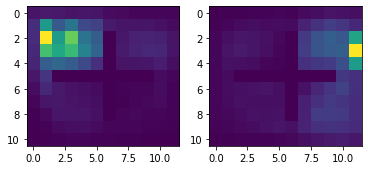

In [35]:
prefix = f'./pymarl/results/tb_logs/gridworld/wall4/EMC_hlevel__2023-07-09_01-32-53/heat_map_'
pltheatmap(prefix, 5)

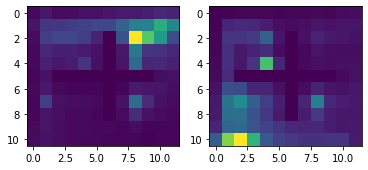

In [5]:
prefix = './pymarl/results/tb_logs/gridworld/wall4/EMC_hlevel__2023-07-11_00-56-41/heat_map_'
pltheatmap(prefix, 5, 9)